# Income Classification Project

This is credit modeling project. Fit and predict one's income based on various indicators

## Importing the dataset
[Dataset Here](https://datahub.io/machine-learning/adult#resource-adult)
[About the Dataset](https://archive.ics.uci.edu/ml/datasets/Adult)
Please store in the same working director as your jupyter notebook.


In [176]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [177]:
# seaborn custom paramenters for uniformity
from matplotlib import rcParams
import matplotlib.pyplot as plt
import matplotlib as mpl

## Columns/Features of Dataset

In [178]:
# import the file path and import csv to dataframe
file = 'adult.csv'
df = pd.read_csv(file)

print(df.info())

columns = df.columns; columns_list= columns.tolist()
num_columns = columns.nunique(); print("Number of columns:", num_columns, "\n", columns_list)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capitalgain     48842 non-null  int64 
 11  capitalloss     48842 non-null  int64 
 12  hoursperweek    48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  class           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None
Number of columns: 15 
 ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'ma

## Column Values

In [179]:
for x in columns_list:
    print(x) # print column name
    variable_categories = df[x].unique(); print(variable_categories, "\n")

age
[2 3 1 0 4] 

workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

fnlwgt
[ 77516  83311 215646 ... 173449  89686 350977] 

education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 

education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] 

marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] 

occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' nan
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv'] 

relationship
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative'] 

race
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Ot

# Examining the label "class"


<AxesSubplot:title={'center':'Distinct Demographics and Income Class'}, xlabel='class', ylabel='count'>

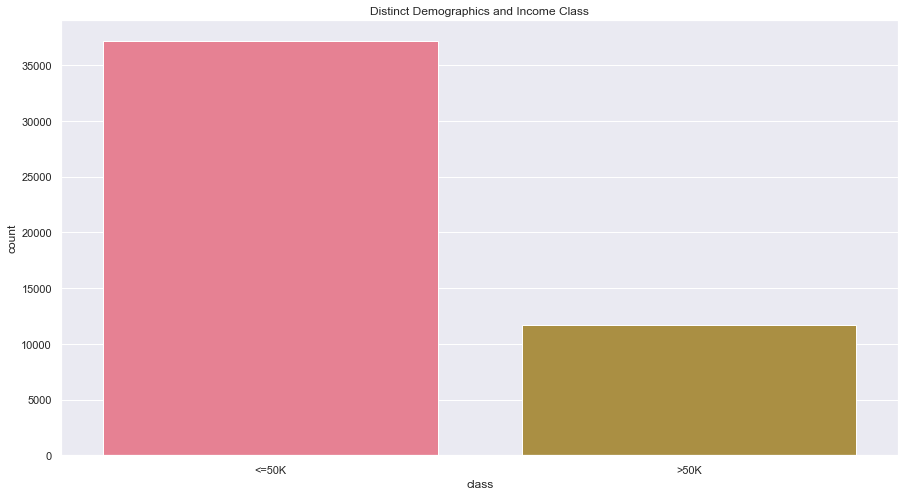

In [180]:
# look at the frequency of each class in y
rcParams['figure.figsize'] = 15,8
sns.set_theme(style = "darkgrid", palette= "husl")

plt.title("Distinct Demographics and Income Class")
sns.countplot(x="class", data = df)

There is a large skew of labels. When visualizing data against class, it will be misleading by showing a strong relationship to <=50k.

## Sector and Pay:


Text(0, 0.5, 'Count')

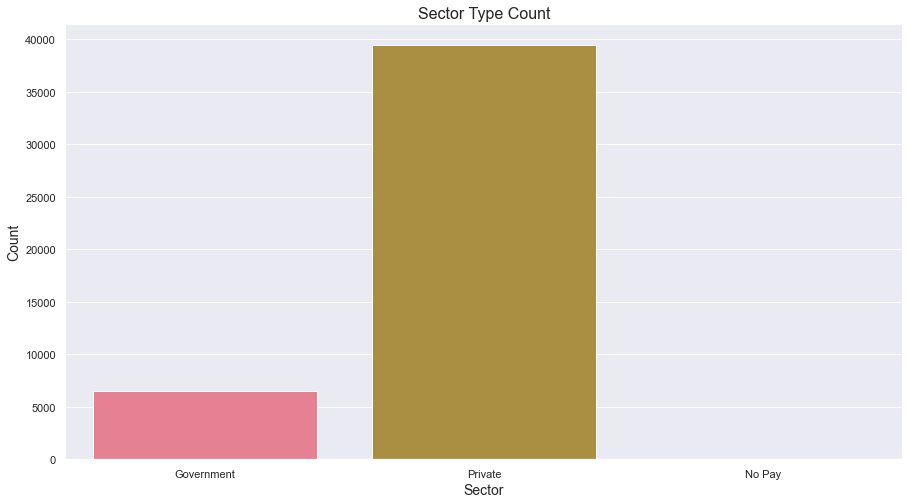

In [181]:
# Filter dataframe 1 and create three
government_sector = df[(df['workclass'] == 'State-gov') | (df['workclass'] == 'Federal-gov') | (df['workclass'] == 'Local-gov')]
private_sector = df[(df['workclass'] == 'Self-emp-not-inc') | (df['workclass'] == 'Self-emp-inc') | (df['workclass'] == 'Private')]
no_pay = df[(df['workclass'] == 'Without-pay') | (df['workclass'] == 'Never-worked')]

sector_data = {'Sector' : ["Government", "Private", "No Pay"], 'Count' : [len(government_sector), len(private_sector), len(no_pay)]}
sector_df = pd.DataFrame(sector_data)

sns.barplot(data = sector_df, x = 'Sector', y = 'Count')
plt.title("Sector Type Count", fontsize = 16)
plt.xlabel("Sector",fontsize = 14); plt.ylabel("Count", fontsize = 14)

As you can see,

## Occupation and Capital Gains

Text(0, 0.5, 'Occupation')

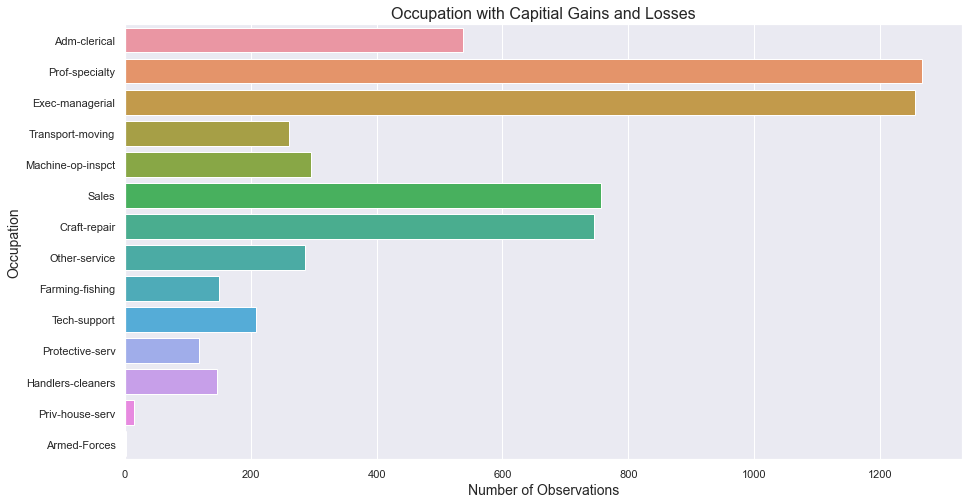

In [182]:
afford_capital = df[(df["capitalgain"] != 0 )| (df["capitalloss"] != 0)]
sns.countplot(data = afford_capital, y = 'occupation')
plt.title("Occupation with Capitial Gains and Losses", fontsize = 16)
plt.xlabel("Number of Observations", fontsize = 14)
plt.ylabel("Occupation", fontsize = 14)

# Creating DataFrames for the Classification Models
Race, Sex, Native Country are the discriminatory features.

Types of DataFrames:
* Entire Dataframe: has fnlwgt and discrimination (++)
* Type I: no discrimination and no fnlwgt (- -)
* Type II: has discrimination and no fnlwgt (+-)
* Type III: no discrimination and fnlwgt  (-+)

In [183]:
# Helper Block #
print(df.info())

def column_values(dataframe):
    column_list = dataframe.columns.tolist()
    for x in column_list:
        print(x) # prints the column names
        value_list = df[x].unique().tolist()
        print(value_list)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capitalgain     48842 non-null  int64 
 11  capitalloss     48842 non-null  int64 
 12  hoursperweek    48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  class           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None


In [184]:
# don' delete this block #

# start with the base DataFrame and drop nan value

base_df = df.copy(); base_df.dropna() # remove missing values, did not affect the number of observation

print("Coding Process Started")

# We should replace broad categories

# 1. Workclass feature
private = ['Self-emp-not-inc', 'Self-emp-inc', 'Private']
public = ['State-gov', 'Federal-gov', 'Local-gov']
other = ['Without-pay', 'Never-worked']

base_df = base_df.replace(to_replace = private, value = 'Private')
base_df = base_df.replace(to_replace = public, value = 'Public')
base_df = base_df.replace(to_replace= other, value = "other")

# 2. Categorize education feature (Thanks Will!)

did_not_grad_hs = ['Preschool','1st-4th','5th-6th','7th-8th','9th','10th', '11th', '12th']
no_uni_grad = ['HS-grad']
some_college = ['Some-college']
assoc_grad = ['Assoc-acdm','Assoc-voc']
advanced_degree = ['Masters', 'Doctorate']
prof_school = ['Prof-school']

base_df = base_df.replace(to_replace = did_not_grad_hs, value = 'No H.S. Diploma')
base_df = base_df.replace(to_replace = no_uni_grad, value = "H.S. Diploma")
base_df = base_df.replace(to_replace = assoc_grad, value = "Junior College Experience")
base_df = base_df.replace(to_replace = advanced_degree, value = "Master's/PhD")
base_df = base_df.replace(to_replace = some_college, value = "Some College. No Degree")
base_df = base_df.replace(to_replace = prof_school, value = "Professional School")

# 3. Categorize marital status

base_df = base_df.replace(['Married-civ-spouse','Married-AF-spouse','Married-spouse-absent'],'Currently Married')
base_df = base_df.replace(['Divorced','Separated','Widowed'], "Married Prior")
base_df = base_df.replace('Never-married', 'Has not married')

# 4. Categorize Occupation

executives = ['Exec-managerial']
adv_profession = ['Prof-specialty']
back_office = ['Adm-clerical', 'Sales']
protection = ['Protective-serv', 'Armed-Forces']
tech = ['Tech-support', 'Machine-op-inspect']
labor = ['Handlers-cleaners', 'Craft-repair', 'Transport-moving', 'Farming-fishing']
other = ['Other-service', 'Priv-house-serv']

base_df = base_df.replace(executives, 'exec')
base_df = base_df.replace(adv_profession, 'prof')
base_df = base_df.replace(back_office, 'back_office')
base_df = base_df.replace(protection, 'protection')
base_df = base_df.replace(tech, 'tech')
base_df = base_df.replace(labor, 'labor')
base_df = base_df.replace(other, 'other')

# 5. Categorize Native Country
us_native = ['United-States']
non_us_native = base_df['native-country'].unique().tolist(); non_us_native.remove('United-States')

base_df = base_df.replace(us_native,  'US')
base_df = base_df.replace(non_us_native,  'foreign')

print("Coding Process Ended!")

Coding Process Started
Coding Process Ended!


## DataFrames with removed columns (Types are explained above)

In [185]:
# create copies because you are dropping different columns not stacking up the drops
type_I, type_II, type_III = base_df.copy(), base_df.copy(), base_df.copy()

# remember base_df too!
type_I   = type_I.drop (columns = ['race', 'sex', 'native-country', 'fnlwgt'])
type_II  = type_II.drop(columns = 'fnlwgt')
type_III = type_III.drop(columns = ['race', 'sex', 'native-country', 'fnlwgt'])

# Model Development with Scikit-Learn Classification Algorithms

There will be two data set: one containing discriminatory features and not containing discriminatory features. The model is generated using classification algorithms.

Will
* K-Nearest
* Naive Bayes
* Logistic Regression
* Random Forest

Uy
* Support Vector Matching
* Linear Discrimination Analysis
* Decision Tree

[Types of Algorithms](https://stackabuse.com/overview-of-classification-methods-in-python-with-scikit-learn/)
[Classification](https://scikit-learn.org/stable/)

## ML Preprocessing Step for all the dataframes

In [186]:
# Import Block
import numpy as np

## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

## for machine learning
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition, svm, datasets
## for explainer
from lime import lime_tabular

In [187]:
# Transform each unique objects in a number
encode_base = base_df.apply(LabelEncoder().fit_transform)
encode_type_I = type_I.apply(LabelEncoder().fit_transform)
encode_type_II = type_II.apply(LabelEncoder().fit_transform)
encode_type_III = type_III.apply(LabelEncoder().fit_transform)


# Create a Feature Matrix by dropping class
base_features = encode_base.drop(columns = ['class'])
type_I_features = encode_type_I.drop(columns = ['class'])
type_II_features = encode_type_II.drop(columns = ['class'])
type_III_features = encode_type_III.drop(columns = ['class'])

# Create label, the predictor variable y, for each dataframe
base_df_y = encode_base['class']
type_I_y = encode_type_I['class']
type_II_y = encode_type_II['class']
type_III_y = encode_type_III['class']

## Splitting Training Data and Testing Data

## Support Vector Machine (SVM) ML Method

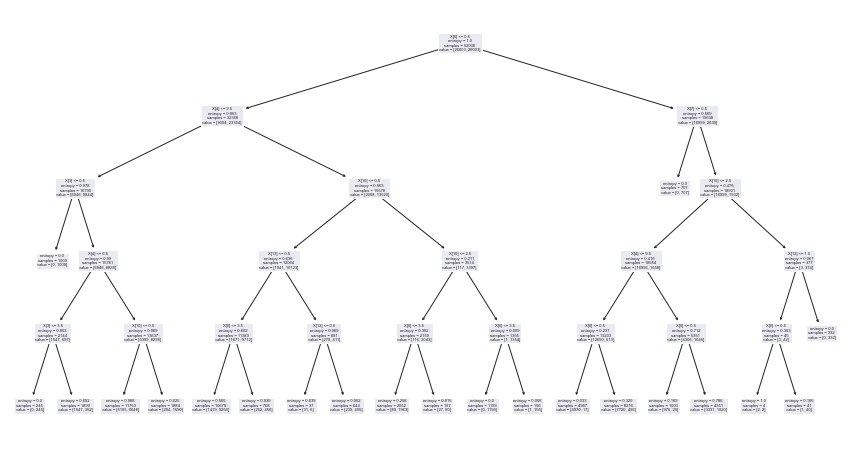

<Figure size 1080x576 with 0 Axes>

In [190]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn import tree

x = base_features
y = base_df_y

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test
oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy',min_samples_split=8,max_depth=5)

# Train Decision Tree Classifer
clf.fit(x_train,y_train)
predictions = clf.predict(x_test)

tree.plot_tree(clf)
plt.show()
plt.savefig('out.png', dpi = 700)